# Exploratory Draft

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
from myutils import *

In [3]:
pd.options.display.max_rows = 550

In [4]:
data = pd.read_csv('./data/diabetic_data.csv')

In [5]:
data.head(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30


In [6]:
data.sample(5).transpose()

,84379,49927,70877,17786,98951
encounter_id,265833504,150488250,204221010,65033316,407349944
patient_nbr,65579553,96018426,34301358,13743468,44005104
race,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,Caucasian
gender,Female,Female,Male,Male,Male
age,[70-80),[50-60),[60-70),[50-60),[70-80)
weight,?,?,?,?,?
admission_type_id,1,3,1,3,2
discharge_disposition_id,3,1,3,18,1
admission_source_id,7,1,7,1,1
time_in_hospital,5,1,7,4,3


The dataset consists of over 100000 hospital admissions from patients with diabetes from 130 US hospitals between 1999-2008.
We can see there are many rare values ('?') in the weight, payer_code and medical_specialty features. These could be missing values and We need to impute them.

In [7]:
data.shape

(101766, 50)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

Looking through the columns, we can see there are some identification, numerical and categorical features.

In [10]:
data.duplicated().sum()

0

In [11]:
pd.concat([data['race'].value_counts(),data['race'].value_counts(normalize=True)], axis=1)

,race,race
Caucasian,76099,0.747784
AfricanAmerican,19210,0.188766
?,2273,0.022336
Hispanic,2037,0.020017
Other,1506,0.014799
Asian,641,0.006299


In [12]:
pd.concat([data['gender'].value_counts(),data['gender'].value_counts(normalize=True)], axis=1)

,gender,gender
Female,54708,0.537586
Male,47055,0.462384
Unknown/Invalid,3,0.000029


In [13]:
pd.concat([data['age'].value_counts(),data['age'].value_counts(normalize=True)], axis=1)

,age,age
[70-80),26068,0.256156
[60-70),22483,0.220928
[50-60),17256,0.169565
[80-90),17197,0.168986
[40-50),9685,0.095169
[30-40),3775,0.037095
[90-100),2793,0.027445
[20-30),1657,0.016282
[10-20),691,0.006790
[0-10),161,0.001582


In [14]:
pd.concat([data['weight'].value_counts(),data['weight'].value_counts(normalize=True)], axis=1)

,weight,weight
?,98569,0.968585
[75-100),1336,0.013128
[50-75),897,0.008814
[100-125),625,0.006142
[125-150),145,0.001425
[25-50),97,0.000953
[0-25),48,0.000472
[150-175),35,0.000344
[175-200),11,0.000108
>200,3,0.000029


In [15]:
pd.concat([data['readmitted'].value_counts(),data['readmitted'].value_counts(normalize=True)], axis=1)

,readmitted,readmitted
NO,54864,0.539119
>30,35545,0.349282
<30,11357,0.111599


# objective

Given that a readmission in less than 30 days is not good and even it  could be dangerous for the patient, **I'm going to predict a readmission** in this period of time in order to prevent or anticipate a possible complication or in the worst case, a death.

## missing values

In [16]:
df = data.groupby(['age', 'readmitted'])['readmitted'].count()

In [17]:
per_missing(data)

,0,1
encounter_id,0,0.0
troglitazone,0,0.0
chlorpropamide,0,0.0
glimepiride,0,0.0
acetohexamide,0,0.0
glipizide,0,0.0
glyburide,0,0.0
tolbutamide,0,0.0
pioglitazone,0,0.0
rosiglitazone,0,0.0


## Constant Values

In [18]:
ctes = var_unicos(data)[var_unicos(data)['Unicos']==1]
ctes

,index,Unicos,Tipo
39,examide,1,object
40,citoglipton,1,object


`examide` and `citoglipton` have a single value for all the data points so we should eliminate them.

In [19]:
data.drop(ctes['index'].tolist(), axis=1, inplace=True)

In [20]:
data.shape

(101766, 48)

## Valores Unicos

We this function we can see quickly the number of different values for each feature.

In [21]:
var_unicos(data)

,index,Unicos,Tipo
46,diabetesMed,2,object
45,change,2,object
44,metformin-pioglitazone,2,object
29,acetohexamide,2,object
43,metformin-rosiglitazone,2,object
42,glimepiride-pioglitazone,2,object
41,glipizide-metformin,2,object
32,tolbutamide,2,object
37,troglitazone,2,object
47,readmitted,3,object


## categoricos/numericos

In [22]:
categorical_cols = var_unicos(data)[var_unicos(data)['Tipo']=='object'] ######## Definir n° discret
categorical_cols = categorical_cols['index'].tolist()

numeric_cols = var_unicos(data)[var_unicos(data)['Tipo']!='object'] ######## Definir n° discret
numeric_cols = numeric_cols['index'].tolist()

print(len(categorical_cols), 'Categorical variables')
print(len(numeric_cols), 'numeric variables')

35 Categorical variables
13 numeric variables


In [23]:
#var_unicos(data[numeric_cols])

In [24]:
#var_unicos(data[categorical_cols])

# Feature Engineering

Let's dive into categorical features to see if there's something rare or a non representative value.
What I do here is to put a threshold(5%) to consider that a value of a feature is representative.

In [25]:
eliminar = []
rare = []

for var in [ c for c in categorical_cols ]:
    temp = pd.concat( [ ( data.groupby([var])[var].count()/len(data) ).rename("[%]"),
             ( data.groupby([var])[var].count() ).rename("count")], axis=1
        ).sort_values(by='[%]', ascending=False)
    if temp.iloc[(temp.shape[0]-1)]['[%]']<0.05:
        if temp.shape[0]>2:
            rare.append(var)
        else:
            eliminar.append(var)
            print(temp)
            print(temp.iloc[(temp.shape[0]-1)]['[%]'])
            print("------------------------------------------------------------------------------------")

                            [%]   count
metformin-pioglitazone                 
No                      0.99999  101765
Steady                  0.00001       1
9.82646463455378e-06
------------------------------------------------------------------------------------
                   [%]   count
acetohexamide                 
No             0.99999  101765
Steady         0.00001       1
9.82646463455378e-06
------------------------------------------------------------------------------------
                             [%]   count
metformin-rosiglitazone                 
No                       0.99998  101764
Steady                   0.00002       2
1.965292926910756e-05
------------------------------------------------------------------------------------
                              [%]   count
glimepiride-pioglitazone                 
No                        0.99999  101765
Steady                    0.00001       1
9.82646463455378e-06
--------------------------------------------

In [26]:
len(categorical_cols)

35

### eliminar

There are some features which don't help to predict neither generalize.

In [27]:
print(eliminar)
print(len(eliminar))

['metformin-pioglitazone', 'acetohexamide', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'tolbutamide', 'troglitazone']
7


In [28]:
for var in eliminar:
    temp = pd.concat( [ ( data.groupby([var])[var].count()/len(data) ).rename("[%]"),
             ( data.groupby([var])[var].count() ).rename("count")], axis=1
        ).sort_values(by='[%]', ascending=False)
    print(temp)
    print(temp.iloc[(temp.shape[0]-1)]['[%]'])
    print("------------------------------------------------------------------------------------")

                            [%]   count
metformin-pioglitazone                 
No                      0.99999  101765
Steady                  0.00001       1
9.82646463455378e-06
------------------------------------------------------------------------------------
                   [%]   count
acetohexamide                 
No             0.99999  101765
Steady         0.00001       1
9.82646463455378e-06
------------------------------------------------------------------------------------
                             [%]   count
metformin-rosiglitazone                 
No                       0.99998  101764
Steady                   0.00002       2
1.965292926910756e-05
------------------------------------------------------------------------------------
                              [%]   count
glimepiride-pioglitazone                 
No                        0.99999  101765
Steady                    0.00001       1
9.82646463455378e-06
--------------------------------------------

These features are not significative so we should delete them.

In [29]:
data = data.drop(eliminar, axis=1)

### rare

There are some features that have some significant values but some of these values aren't, so we should treat them differently. What I did here was reduce the categories.

In [30]:
print(rare)
print(len(rare))

['gender', 'tolazamide', 'repaglinide', 'acarbose', 'rosiglitazone', 'pioglitazone', 'glyburide-metformin', 'glyburide', 'glipizide', 'glimepiride', 'chlorpropamide', 'nateglinide', 'miglitol', 'A1Cresult', 'max_glu_serum', 'metformin', 'race', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
24


In [31]:
for var in rare:
    temp = pd.concat( [ ( data.groupby([var])[var].count()/len(data) ).rename("[%]"),
             ( data.groupby([var])[var].count() ).rename("count")], axis=1
        ).sort_values(by='[%]', ascending=False)
    print(temp)
    print(temp.iloc[(temp.shape[0]-1)]['[%]'])
    print("------------------------------------------------------------------------------------")

                      [%]  count
gender                          
Female           0.537586  54708
Male             0.462384  47055
Unknown/Invalid  0.000029      3
2.947939390366134e-05
------------------------------------------------------------------------------------
                 [%]   count
tolazamide                  
No          0.999617  101727
Steady      0.000373      38
Up          0.000010       1
9.82646463455378e-06
------------------------------------------------------------------------------------
                  [%]   count
repaglinide                  
No           0.984877  100227
Steady       0.013600    1384
Up           0.001081     110
Down         0.000442      45
0.0004421909085549201
------------------------------------------------------------------------------------
               [%]   count
acarbose                  
No        0.996973  101458
Steady    0.002899     295
Up        0.000098      10
Down      0.000029       3
2.947939390366134e-05
------

In [32]:
eliminar = ['tolazamide', 'repaglinide', 'acarbose', 'glyburide-metformin', 'chlorpropamide', 'nateglinide', 'miglitol']
data = data.drop(eliminar, axis=1)

In [33]:
data['payer_code'] = data['payer_code'].replace({ '?' : 'rare' })
data['payer_code'] = np.where( data['payer_code'].isin(['MC','HM','SP','BC','MD','CP','UN','rare']), data['payer_code'], "other")
data['weight'] = np.where( data['weight']=="?" , "1", "0")
data['age'] = np.where( data['age'].isin(['[20-30)','[10-20)','[0-10)']), "[0-30)", data['age'])
data['race'] = np.where( data['race'].isin(['?','Asian','Other','Hispanic']), "Other", data['race'])
data['metformin'] = np.where( data['metformin']!="Steady", "No", data['metformin'])
data['max_glu_serum'] = np.where( data['max_glu_serum']==">300", ">200", data['max_glu_serum'])
#data['A1Cresult'] = np.where( data['A1Cresult']==">8", ">7", data['A1Cresult'])
data['glimepiride'] = np.where( data['glimepiride']!="Steady", "No", data['glimepiride'])
data['glipizide'] = np.where( data['glipizide']!="Steady", "No", data['glipizide'])
data['glyburide'] = np.where( data['glyburide']!="Steady", "No", data['glyburide'])
data['pioglitazone'] = np.where( data['pioglitazone']!="Steady", "No", data['pioglitazone'])
data['rosiglitazone'] = np.where( data['rosiglitazone']!="Steady", "No", data['rosiglitazone'])

There are some 3 registers that don't have gender so I filter them.

In [34]:
data = data.loc[data.gender.isin(['Female', 'Male'])]

In [36]:
categorical_cols = var_unicos(data)[var_unicos(data)['Tipo']=='object'] ######## Definir n° discret
categorical_cols = categorical_cols['index'].tolist()

numeric_cols = var_unicos(data)[var_unicos(data)['Tipo']!='object'] ######## Definir n° discret
numeric_cols = numeric_cols['index'].tolist()

print(len(categorical_cols), 'Categorical variables')
print(len(numeric_cols), 'numeric variables')

21 Categorical variables
13 numeric variables


In [37]:
eliminar = []
rare = []

#for var in [ c for c in categorical_cols if c!='Y.TargetNewDigital.3']:
for var in [ c for c in categorical_cols ]:
    temp = pd.concat( [ ( data.groupby([var])[var].count()/len(data) ).rename("[%]"),
             ( data.groupby([var])[var].count() ).rename("count")], axis=1
        ).sort_values(by='[%]', ascending=False)
    if temp.iloc[(temp.shape[0]-1)]['[%]']<0.05:
        if temp.shape[0]>2:
            rare.append(var)
        else:
            eliminar.append(var)
            print(temp)
            print(temp.iloc[(temp.shape[0]-1)]['[%]'])
            print("------------------------------------------------------------------------------------")

             [%]  count
weight                 
1       0.968584  98566
0       0.031416   3197
0.03141613356524474
------------------------------------------------------------------------------------
                  [%]  count
glimepiride                 
No           0.954109  97093
Steady       0.045891   4670
0.04589094268054204
------------------------------------------------------------------------------------


I delete these feature too because they aren't representative.

In [38]:
print(eliminar)
print(len(eliminar))

['weight', 'glimepiride']
2


In [39]:
print(rare)
print(len(rare))

['max_glu_serum', 'A1Cresult', 'age', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
8


In [40]:
for var in [ c for c in rare ]:
    temp = pd.concat( [ ( data.groupby([var])[var].count()/len(data) ).rename("[%]"),
             ( data.groupby([var])[var].count() ).rename("count")], axis=1
        ).sort_values(by='[%]', ascending=False)
    print(temp)
    print("------------------------------------------------------------------------------------")

                    [%]  count
max_glu_serum                 
None           0.947466  96417
>200           0.027014   2749
Norm           0.025520   2597
------------------------------------------------------------------------------------
                [%]  count
A1Cresult                 
None       0.832768  84745
>8         0.080737   8216
Norm       0.049036   4990
>7         0.037460   3812
------------------------------------------------------------------------------------
               [%]  count
age                      
[70-80)   0.256144  26066
[60-70)   0.220925  22482
[50-60)   0.169570  17256
[80-90)   0.168991  17197
[40-50)   0.095172   9685
[30-40)   0.037096   3775
[90-100)  0.027446   2793
[0-30)    0.024655   2509
------------------------------------------------------------------------------------
                 [%]  count
payer_code                 
rare        0.395576  40255
MC          0.318770  32439
HM          0.061653   6274
SP          0.049203   5007


I reduce this categories using the top 6 of them

In [41]:
top_n = 6
top_n_medical_specialty = 7
vars_top = ['medical_specialty','diag_1', 'diag_2', 'diag_3']

for var in vars_top:
    lista_n= pd.concat( [ ( data.groupby([var])[var].count()/len(data) ).rename("[%]"),
        ( data.groupby([var])[var].count() ).rename("count")], axis=1
        ).sort_values(by='[%]', ascending=False).head(top_n_medical_specialty if var=='medical_specialty' else top_n ).index.tolist()
    print(var)
    print(lista_n)
    data[var] = np.where( data[var].isin(lista_n), data[var], "other")

medical_specialty
['?', 'InternalMedicine', 'Emergency/Trauma', 'Family/GeneralPractice', 'Cardiology', 'Surgery-General', 'Nephrology']
diag_1
['428', '414', '786', '410', '486', '427']
diag_2
['276', '428', '250', '427', '401', '496']
diag_3
['250', '401', '276', '428', '427', '414']


In [42]:
for var in [ c for c in rare ]:
    temp = pd.concat( [ ( data.groupby([var])[var].count()/len(data) ).rename("[%]"),
             ( data.groupby([var])[var].count() ).rename("count")], axis=1
        ).sort_values(by='[%]', ascending=False)
    print(temp)
    print("------------------------------------------------------------------------------------")

                    [%]  count
max_glu_serum                 
None           0.947466  96417
>200           0.027014   2749
Norm           0.025520   2597
------------------------------------------------------------------------------------
                [%]  count
A1Cresult                 
None       0.832768  84745
>8         0.080737   8216
Norm       0.049036   4990
>7         0.037460   3812
------------------------------------------------------------------------------------
               [%]  count
age                      
[70-80)   0.256144  26066
[60-70)   0.220925  22482
[50-60)   0.169570  17256
[80-90)   0.168991  17197
[40-50)   0.095172   9685
[30-40)   0.037096   3775
[90-100)  0.027446   2793
[0-30)    0.024655   2509
------------------------------------------------------------------------------------
                 [%]  count
payer_code                 
rare        0.395576  40255
MC          0.318770  32439
HM          0.061653   6274
SP          0.049203   5007


Checking the distribution of the people who are readmitted

In [43]:
pd.concat( [ ( data.groupby(['readmitted'])['readmitted'].count()/len(data) ).rename("[%]"),
             ( data.groupby(['readmitted'])['readmitted'].count() ).rename("count")], axis=1
        ).sort_values(by='[%]', ascending=False)

,[%],count
readmitted,,
NO,0.539106,54861
>30,0.349292,35545
<30,0.111602,11357


Creating the `target`. Our interested class if a patient is readmitted

In [44]:
data['target'] = np.where( data['readmitted']=="<30", 1, 0)

In [45]:
data.groupby(['readmitted', 'target'])['readmitted'].count()

readmitted  target
<30         1         11357
>30         0         35545
NO          0         54861
Name: readmitted, dtype: int64

In the IDs_mapping.csv file we can see that the codes 11,13,14,19,20,21 of discharge_disposition_id are related with a death or if someone is about to dead, so we shouldn't consider these cases because the output is evident.

In [46]:
data = data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [47]:
pd.concat( [ ( data.groupby(['target'])['target'].count()/len(data) ).rename("[%]"),
             ( data.groupby(['target'])['target'].count() ).rename("count")], axis=1
        ).sort_values(by='[%]', ascending=False)

,[%],count
target,,
0,0.886108,88026
1,0.113892,11314


The `encounter_id` and `patient_nbr` are Identifying features so we should delete them and also the `readmitted` column because we already create the target using this feature.

In [48]:
data = data.drop(['encounter_id','patient_nbr','readmitted'], axis=1)

In [49]:
data['medical_specialty'] = data['medical_specialty'].replace({'?':"missing"})

In [50]:
data.sample(3).transpose()

,29132,85788,21018
race,Caucasian,Caucasian,AfricanAmerican
gender,Male,Female,Male
age,[50-60),[60-70),[70-80)
weight,1,1,1
admission_type_id,2,3,3
discharge_disposition_id,1,3,22
admission_source_id,1,1,1
time_in_hospital,5,3,4
payer_code,MC,HM,rare
medical_specialty,InternalMedicine,other,other


In [51]:
categorical_cols = var_unicos(data)[var_unicos(data)['Tipo']=='object'] ######## Definir n° discret
categorical_cols = categorical_cols['index'].tolist()

numeric_cols = var_unicos(data)[var_unicos(data)['Tipo']!='object'] ######## Definir n° discret
numeric_cols = numeric_cols['index'].tolist()

print(len(categorical_cols), 'Categorical variables')
print(len(numeric_cols), 'numeric variables')

20 Categorical variables
12 numeric variables


In [52]:
data[numeric_cols+categorical_cols].isnull().sum()

target                      0
num_procedures              0
admission_type_id           0
time_in_hospital            0
number_diagnoses            0
admission_source_id         0
number_inpatient            0
discharge_disposition_id    0
number_emergency            0
number_outpatient           0
num_medications             0
num_lab_procedures          0
gender                      0
change                      0
weight                      0
rosiglitazone               0
pioglitazone                0
glyburide                   0
glipizide                   0
glimepiride                 0
metformin                   0
diabetesMed                 0
max_glu_serum               0
race                        0
insulin                     0
A1Cresult                   0
diag_1                      0
diag_2                      0
diag_3                      0
medical_specialty           0
age                         0
payer_code                  0
dtype: int64

**most of the data is ready to use them in a model, there are mane way to do the feature engineering I did just one, I developed Object oriented way to achive all that we wuild so far and the major advantage of using OOP is that pur code is more modular, reusable and debuggable.**

# Models

In this part I started to develop differen Machine Learning Models, it is a draf which shows how I create the models, or how I select the features for the models. To see the final implementation go to [OOP Solution](#oop)

In [53]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
import pandas as pd

In [54]:
clf_and_params=list()

In [55]:
clf=LogisticRegression()
params={'penalty':['l1', 'l2'],
        'C':np.logspace(0, 4, 10)
        }
clf_and_params.append((clf, params))

In [56]:
clf = RandomForestClassifier()
params = {'n_estimators': [4, 6, 9],
          'max_features': ['log2', 'sqrt','auto'],
          'criterion': ['entropy', 'gini'],
          'max_depth': [2, 3, 5, 10],
          'min_samples_split': [2, 3, 5],
          'min_samples_leaf': [1,5,8]
         }
clf_and_params.append((clf, params))

In [57]:
clf_and_params

[(LogisticRegression(),
  {'penalty': ['l1', 'l2'],
   'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
          5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
          3.59381366e+03, 1.00000000e+04])}),
 (RandomForestClassifier(),
  {'n_estimators': [4, 6, 9],
   'max_features': ['log2', 'sqrt', 'auto'],
   'criterion': ['entropy', 'gini'],
   'max_depth': [2, 3, 5, 10],
   'min_samples_split': [2, 3, 5],
   'min_samples_leaf': [1, 5, 8]})]

In [58]:
def crear_dummies_n_1( data_X, col ):
    New_ = pd.get_dummies(data_X[col], prefix=col, drop_first=True )
    
    X_ = data_X.copy()
    X_.drop([col], axis=1, inplace=True)
    
    X_ = pd.concat([X_, New_ ],axis=1)
    
    return X_

In [59]:
print(len(categorical_cols), 'Categorical variables')
print(len(numeric_cols), 'numeric variables')

20 Categorical variables
12 numeric variables


In [60]:
df = data.copy()
for col in categorical_cols:
    df = crear_dummies_n_1(df, col )

In [61]:
df.sample(3).transpose()

,92621,36324,65811
admission_type_id,1,1,2
discharge_disposition_id,1,1,6
admission_source_id,7,6,7
time_in_hospital,3,8,5
num_lab_procedures,53,58,34
num_procedures,0,5,0
num_medications,18,24,10
number_outpatient,0,0,0
number_emergency,0,0,7
number_inpatient,0,0,9


In [62]:
print(df.shape)
print(data.shape)

(99340, 72)
(99340, 32)


In [63]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
y_train=df['target']
train=df.drop('target', axis=1)

## Select Drivers

In [65]:
################# Select Drivers ##########################
filter_col = train.columns #selecionar features ###<<<<<<<<<<<<
#target='target'

forest = RFC(n_jobs=2,n_estimators=250)
forest.fit(train[filter_col], y_train)
importances1 = forest.feature_importances_

extree = ExtraTreesClassifier()
extree.fit(train[filter_col], y_train)
# display the relative importance of each attribute
relval = extree.feature_importances_

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(train[filter_col], y_train)
importances2 = forest.feature_importances_

top_v = 50
drivers1 = pd.DataFrame( {'IMP':importances1 ,'Driver':filter_col} 
            ).sort_values(by=["IMP"],ascending=False).head(top_v)['Driver'].tolist()
drivers2 = pd.DataFrame( {'IMP':relval ,'Driver':filter_col} 
            ).sort_values(by=["IMP"],ascending=False).head(top_v)['Driver'].tolist()
drivers3 = pd.DataFrame( {'IMP':importances2 ,'Driver':filter_col} 
            ).sort_values(by=["IMP"],ascending=False).head(top_v)['Driver'].tolist()

drivers = drivers1+drivers2+drivers3
drivers = set(drivers)
drivers = list(drivers)
print(len(drivers))

51


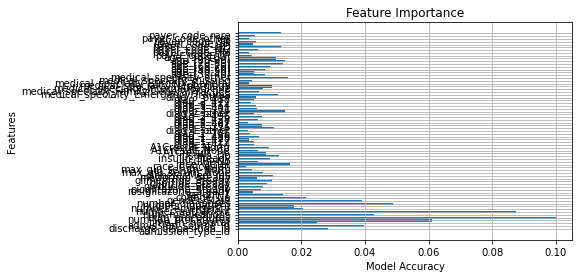

In [66]:
pos = np.arange( len(filter_col) ) + 0.1 ## Cambiar por el numero de variables <<<<<<<<<==========
plt.barh(pos, importances1, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, (filter_col))
plt.grid(True)

In [67]:
pd.DataFrame( {'IMP':importances1 ,'Driver':filter_col} 
            ).sort_values(by=["IMP"],ascending=False).head(top_v)

,IMP,Driver
4,0.100120,num_lab_procedures
6,0.087305,num_medications
3,0.061202,time_in_hospital
9,0.048679,number_inpatient
5,0.042906,num_procedures
1,0.039673,discharge_disposition_id
10,0.039061,number_diagnoses
0,0.028298,admission_type_id
2,0.024846,admission_source_id
11,0.021499,gender_Male


In [68]:
top_v = 25
drivers1 = pd.DataFrame( {'IMP':importances1 ,'Driver':filter_col} 
            ).sort_values(by=["IMP"],ascending=False).head(top_v)['Driver'].tolist()
drivers2 = pd.DataFrame( {'IMP':relval ,'Driver':filter_col} 
            ).sort_values(by=["IMP"],ascending=False).head(top_v)['Driver'].tolist()
drivers3 = pd.DataFrame( {'IMP':importances2 ,'Driver':filter_col} 
            ).sort_values(by=["IMP"],ascending=False).head(top_v)['Driver'].tolist()

drivers = drivers1+drivers2+drivers3
drivers = set(drivers)
drivers = list(drivers)
print(len(drivers))

27


In [69]:
drivers

['race_Caucasian',
 'time_in_hospital',
 'diag_1_other',
 'num_procedures',
 'diag_3_other',
 'gender_Male',
 'number_inpatient',
 'admission_type_id',
 'payer_code_MC',
 'discharge_disposition_id',
 'age_[80-90)',
 'number_diagnoses',
 'metformin_Steady',
 'diag_2_other',
 'number_outpatient',
 'medical_specialty_missing',
 'payer_code_rare',
 'age_[60-70)',
 'insulin_Steady',
 'medical_specialty_InternalMedicine',
 'age_[70-80)',
 'admission_source_id',
 'num_lab_procedures',
 'num_medications',
 'number_emergency',
 'glipizide_Steady',
 'change_No']

In [70]:
clf_and_params

[(LogisticRegression(),
  {'penalty': ['l1', 'l2'],
   'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
          5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
          3.59381366e+03, 1.00000000e+04])}),
 (RandomForestClassifier(),
  {'n_estimators': [4, 6, 9],
   'max_features': ['log2', 'sqrt', 'auto'],
   'criterion': ['entropy', 'gini'],
   'max_depth': [2, 3, 5, 10],
   'min_samples_split': [2, 3, 5],
   'min_samples_leaf': [1, 5, 8]})]

In [71]:
clf_and_params[1]

(RandomForestClassifier(),
 {'n_estimators': [4, 6, 9],
  'max_features': ['log2', 'sqrt', 'auto'],
  'criterion': ['entropy', 'gini'],
  'max_depth': [2, 3, 5, 10],
  'min_samples_split': [2, 3, 5],
  'min_samples_leaf': [1, 5, 8]})

In [72]:
clf_and_params[1][1]

{'n_estimators': [4, 6, 9],
 'max_features': ['log2', 'sqrt', 'auto'],
 'criterion': ['entropy', 'gini'],
 'max_depth': [2, 3, 5, 10],
 'min_samples_split': [2, 3, 5],
 'min_samples_leaf': [1, 5, 8]}

In [73]:
from sklearn.metrics import recall_score

In [74]:
grid_search_clf = GridSearchCV(clf_and_params[1][0], clf_and_params[1][1], cv=5, )

In [75]:
grid_search_clf.fit(train[drivers], y_train)
#Y_pred = grid_search_clf.predict(X_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 10],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [4, 6, 9]})

In [76]:
grid_search_clf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 10],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [4, 6, 9]})

In [139]:
clf_train_acc = round(grid_search_clf.score(train, y_train) * 100, 2)
print(current_clf_name, " trained and used for prediction on test data...")
print(clf_train_acc)

RandomForestClassifier  trained and used for prediction on test data...
88.64


In [141]:
clf_train_acc = round(grid_search_clf.score(train[drivers], y_train) * 100, 2)
print(current_clf_name, " trained and used for prediction on test data...")
print(clf_train_acc)

RandomForestClassifier  trained and used for prediction on test data...
88.7


<a class="anchor" id="oop"></a>
# OOP Solution

In this part, I developed five classes.

`Information`: This class prints summary information about the dataset.

`Preprocess`: This helps us to do the preprocessing on the dataset.

`PreprocessStrategy`: This class helps us to develop different pre-processing strategies.

`GridSearchHelper`: This contains all the parameter optimization process for machine learning algorithms.

`ObjectOrientedDiabetes`: The class for which all classes are managed.

## Information Class

In [77]:
class Information():

    def __init__(self):
        """
        This class give some brief information about the datasets.
        Information introduced in R language style
        """
        print("Information object created")

    def _get_missing_values(self,data):
        """
        Find missing values of given datad
        :param data: checked its missing value
        :return: Pandas Series object
        """
        #Getting sum of missing values for each feature
        missing_values = data.isnull().sum()
        #Feature missing values are sorted from few to many
        missing_values.sort_values(ascending=False, inplace=True)
        
        #Returning missing values
        return missing_values

    def info(self,data):
        """
        print feature name, data type, number of missing values and ten samples of 
        each feature
        :param data: dataset information will be gathered from
        :return: no return value
        """
        feature_dtypes=data.dtypes
        self.missing_values=self._get_missing_values(data)

        print("=" * 50)

        print("{:16} {:16} {:25} {:16}".format("Feature Name".upper(),
                                            "Data Format".upper(),
                                            "# of Missing Values".upper(),
                                            "Samples".upper()))
        for feature_name, dtype, missing_value in zip(self.missing_values.index.values,
                                                      feature_dtypes[self.missing_values.index.values],
                                                      self.missing_values.values):
            print("{:18} {:19} {:19} ".format(feature_name, str(dtype), str(missing_value)), end="")
            for v in data[feature_name].values[:10]:
                print(v, end=",")
            print()

        print("="*50)

### prueba

In [78]:
info = Information()

Information object created


In [79]:
info.info(data)

FEATURE NAME     DATA FORMAT      # OF MISSING VALUES       SAMPLES         
target             int32               0                   0,0,0,0,0,0,0,0,0,0,
diabetesMed        object              0                   No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
gender             object              0                   Female,Female,Female,Male,Male,Male,Male,Male,Female,Female,
age                object              0                   [0-30),[0-30),[0-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),
weight             object              0                   1,1,1,1,1,1,1,1,1,1,
admission_type_id  int64               0                   6,1,1,1,1,2,3,1,2,3,
discharge_disposition_id int64               0                   25,1,1,1,1,1,1,1,1,3,
admission_source_id int64               0                   1,7,7,7,7,2,2,7,4,4,
time_in_hospital   int64               0                   1,3,2,2,1,3,4,5,13,12,
payer_code         object              0                   rare,rare,rare,ra

## Preprocess Class

In [80]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
class Preprocess():

    def __init__(self):
        print("Preprocess object created")

    def fillna(self, data, fill_strategies):
        for column, strategy in fill_strategies.items():
            if strategy == 'None':
                data[column] = data[column].fillna('None')
            elif strategy == 'Zero':
                data[column] = data[column].fillna(0)
            elif strategy == 'Mode':
                data[column] = data[column].fillna(data[column].mode()[0])
            elif strategy == 'Mean':
                data[column] = data[column].fillna(data[column].mean())
            elif strategy == 'Median':
                data[column] = data[column].fillna(data[column].median())
            else:
                print("{}: There is no such thing as preprocess strategy".format(strategy))

        return data

    def drop(self, data, drop_strategies):
        for column, strategy in drop_strategies.items():
            data=data.drop(labels=[column], axis=strategy)

        return data

    def feature_engineering(self, data, engineering_strategies=1):
        if engineering_strategies==1:
            return self._feature_engineering1(data)

        return data

    def _feature_engineering1(self,data):

        data=self._base_feature_engineering(data)
        #data = data.loc[data.gender.isin(['Female', 'Male'])]

        drop_strategy = {'examide': 1,  # 1 indicate axis 1(column)
            'citoglipton': 1,
            'metformin-pioglitazone': 1,
            'acetohexamide': 1,
            'metformin-rosiglitazone': 1,
            'glimepiride-pioglitazone': 1,
            'glipizide-metformin': 1,
            'tolbutamide': 1,
            'troglitazone': 1,
            'tolazamide': 1,
            'repaglinide': 1,
            'acarbose': 1,
            'glyburide-metformin': 1,
            'chlorpropamide': 1,
            'nateglinide': 1,
            'miglitol': 1,
            'weight': 1}
        data = self.drop(data, drop_strategy)
        
        vars_top = ['medical_specialty','diag_1', 'diag_2', 'diag_3']
        outliers_top = ['number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient', 'num_medications', 'num_lab_procedures']
        top_n = 6
        
        data = self._top_n_categorics(data, vars_top, top_n)
        data = self._top_outliers(data, outliers_top )
        
        data = self._top_n_categorics(data, ['admission_type_id'], 5)
        data = self._top_n_categorics(data, ['admission_source_id'], 4)
        data = self._top_n_categorics(data, ['discharge_disposition_id'], 6)

        return data

    def _base_feature_engineering(self,data):
        data[['admission_type_id', 'admission_source_id', 'discharge_disposition_id']] = data[['admission_type_id', 'admission_source_id', 'discharge_disposition_id']].astype(str)
        
        data['payer_code'] = data['payer_code'].replace({ '?' : 'rare' })
        data['payer_code'] = np.where( data['payer_code'].isin(['MC','HM','SP','BC','MD','CP','UN','rare']), data['payer_code'], "other")
        data['weight'] = np.where( data['weight']=="?" , "1", "0")
        data['age'] = np.where( data['age'].isin(['[20-30)','[10-20)','[0-10)']), "[0-30)", data['age'])
        data['race'] = np.where( data['race'].isin(['?','Asian','Other','Hispanic']), "Other", data['race'])
        data['metformin'] = np.where( data['metformin']!="Steady", "No", data['metformin'])
        data['max_glu_serum'] = np.where( data['max_glu_serum']==">300", ">200", data['max_glu_serum'])
        #data['A1Cresult'] = np.where( data['A1Cresult']==">8", ">7", data['A1Cresult'])
        data['glimepiride'] = np.where( data['glimepiride']!="Steady", "No", data['glimepiride'])
        data['glipizide'] = np.where( data['glipizide']!="Steady", "No", data['glipizide'])
        data['glyburide'] = np.where( data['glyburide']!="Steady", "No", data['glyburide'])
        data['pioglitazone'] = np.where( data['pioglitazone']!="Steady", "No", data['pioglitazone'])
        data['rosiglitazone'] = np.where( data['rosiglitazone']!="Steady", "No", data['rosiglitazone'])

        return data

    def _label_encoder(self,data):
        labelEncoder=LabelEncoder()
        for column in data.columns.values:
            if 'int64'==data[column].dtype or 'float64'==data[column].dtype or 'int64'==data[column].dtype:
                continue
            labelEncoder.fit(data[column])
            data[column]=labelEncoder.transform(data[column])
        return data
    
    def _top_n_categorics(self, data, vars_top, top_n):
        
        for var in vars_top:
            lista_n= pd.concat( [ ( data.groupby([var])[var].count()/len(data) ).rename("[%]"),
                ( data.groupby([var])[var].count() ).rename("count")], axis=1
                ).sort_values(by='[%]', ascending=False).head(top_n).index.tolist()
            data[var] = np.where( data[var].isin(lista_n), data[var], "other")
        
        return data
    
    def _top_outliers(self, data, vars_top):
        for col in vars_top:
            upper = data[col].quantile(0.98)
            data.loc[data[col]>upper,col] = upper
        
        return data

    def _get_dummies(self, data, prefered_columns=None):

        if prefered_columns is None:
            columns=data.columns.values
            non_dummies=None
        else:
            non_dummies=[col for col in data.columns.values if col not in prefered_columns ]

            columns=prefered_columns


        dummies_data=[pd.get_dummies(data[col],prefix=col) for col in columns]

        if non_dummies is not None:
            for non_dummy in non_dummies:
                dummies_data.append(data[non_dummy])

        return pd.concat(dummies_data, axis=1)

### prueba

In [81]:
prepos = Preprocess()

Preprocess object created


In [86]:
drop_strategy = {'target': 1} # just to prove it
prepos.drop(data, drop_strategy).shape

(99340, 31)

In [87]:
data.shape

(99340, 32)

In [89]:
#prepos.feature_engineering(data).shape

In [39]:
prepos.feature_engineering(data).sample(3).transpose()

,75575,72952,60358
encounter_id,226962108,214545534,169182552
patient_nbr,77427108,70511940,29181195
race,Caucasian,Caucasian,AfricanAmerican
gender,Female,Female,Male
age,[80-90),[60-70),[70-80)
weight,0,0,0
admission_type_id,1,6,1
discharge_disposition_id,1,1,1
admission_source_id,7,7,2
time_in_hospital,3,1,1


## PreprocessStrategy Class

In [97]:
import re
class PreprocessStrategy():
    """
    Preprocess strategies defined and exected in this class
    """
    def __init__(self):
        self.data=None
        self._preprocessor=Preprocess()

    def strategy(self, data, strategy_type="strategy1"):
        self.data=data
        if strategy_type=='strategy1':
            self._strategy1()
        elif strategy_type=='strategy2':
            self._strategy2()

        return self.data

    def _base_strategy(self):
        #self.data['target'] = np.where( self.data['readmitted']=="<30", 1, 0)
        
        drop_strategy = {'encounter_id': 1,  # 1 indicate axis 1(column)
                         'patient_nbr': 1,
                         'readmitted': 1}
        self.data = self._preprocessor.drop(self.data, drop_strategy)
        
        #self.data = self.data.loc[self.data.gender.isin(['Female', 'Male'])]
        #self.data = self.data.loc[~self.data.discharge_disposition_id.isin([11,13,14,19,20,21])]
        self.data = self.data.replace('?', "missing")

        self.data = self._preprocessor.feature_engineering(self.data, 1)
        #self.data = self._preprocessor._label_encoder(self.data)

    def _strategy1(self):
        self._base_strategy()

        self.data=self._preprocessor._get_dummies(self.data,
                                        prefered_columns=['gender', 'change', 'rosiglitazone', 'pioglitazone', 'glyburide', 'glipizide', 'glimepiride', 'metformin', 'diabetesMed', 'max_glu_serum', 'race', 'insulin', 'A1Cresult', 'admission_source_id', 'admission_type_id', 'medical_specialty', 'discharge_disposition_id', 'diag_1', 'diag_3', 'diag_2', 'age', 'payer_code'])
        regex = re.compile(r"\[|\]|<", re.IGNORECASE)
        self.data.columns = [regex.sub("|", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in self.data.columns.values]


    def _strategy2(self):
        self._base_strategy()

        #self.data=self._preprocessor._get_dummies(self.data,
        #                                prefered_columns=None)#None mean that all feature will be dummied

### prueba

In [173]:
prepoStra = PreprocessStrategy()

Preprocess object created


In [174]:
df = prepoStra.strategy(data,strategy_type="strategy1")
df.shape

(99340, 104)

In [165]:
df.sample(3).transpose()

,32148,8643,428
race,Caucasian,Caucasian,Caucasian
gender,Female,Female,Male
age,[70-80),[30-40),[50-60)
admission_type_id,1,3,6
discharge_disposition_id,3,18,other
admission_source_id,7,1,1
time_in_hospital,3,13,1
payer_code,rare,rare,rare
medical_specialty,other,missing,Cardiology
num_lab_procedures,42,61,34


In [167]:
categorical_cols = var_unicos(df)[var_unicos(df)['Tipo']=='object'] ######## Definir n° discret
categorical_cols = categorical_cols['index'].tolist()

numeric_cols = var_unicos(df)[var_unicos(df)['Tipo']!='object'] ######## Definir n° discret
numeric_cols = numeric_cols['index'].tolist()

print(len(categorical_cols), 'Categorical variables')
print(len(numeric_cols), 'numeric variables')

22 Categorical variables
9 numeric variables


In [168]:
var_unicos(df[numeric_cols])

,index,Unicos,Tipo
0,target,2,int32
1,number_emergency,3,float64
2,number_inpatient,5,float64
3,number_outpatient,5,float64
4,num_procedures,7,int64
5,number_diagnoses,9,float64
6,time_in_hospital,14,int64
7,num_medications,37,float64
8,num_lab_procedures,80,float64


### plot

C:\Users\51993\.conda\envs\diabetes\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\51993\.conda\envs\diabetes\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\51993\.conda\envs\diabetes\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

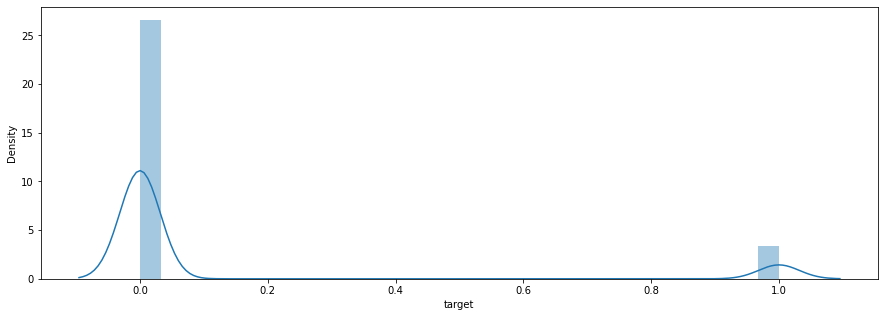

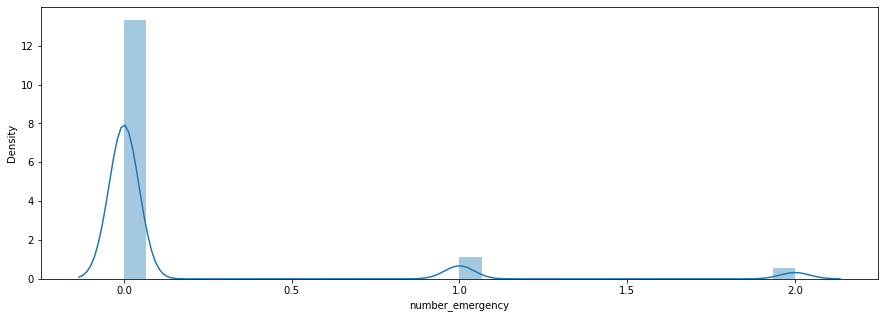

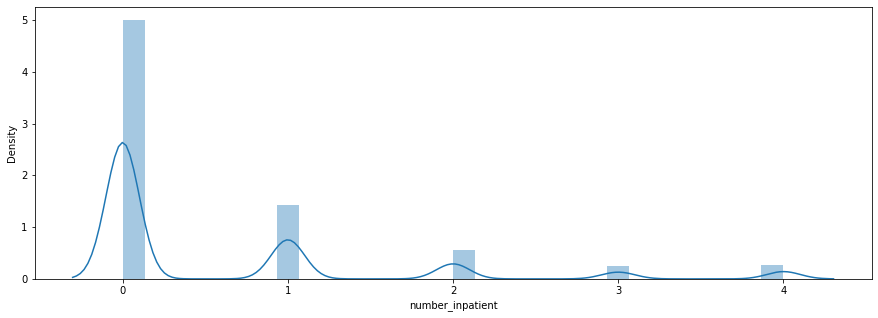

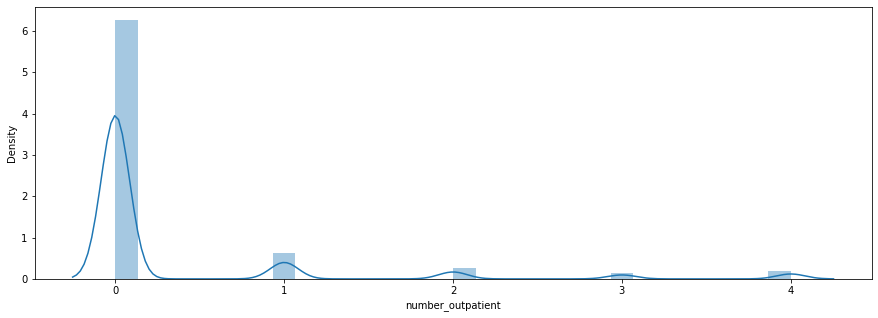

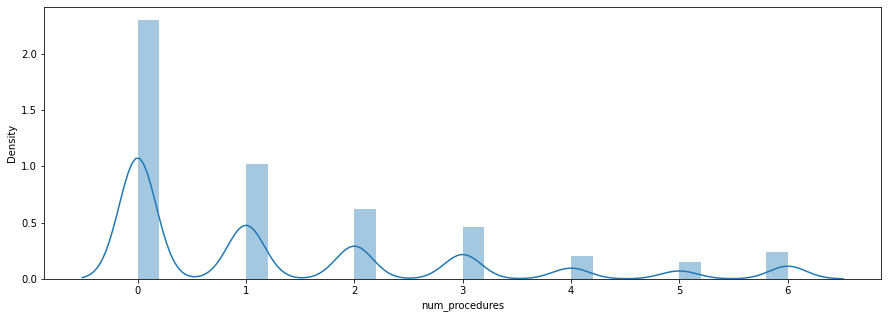

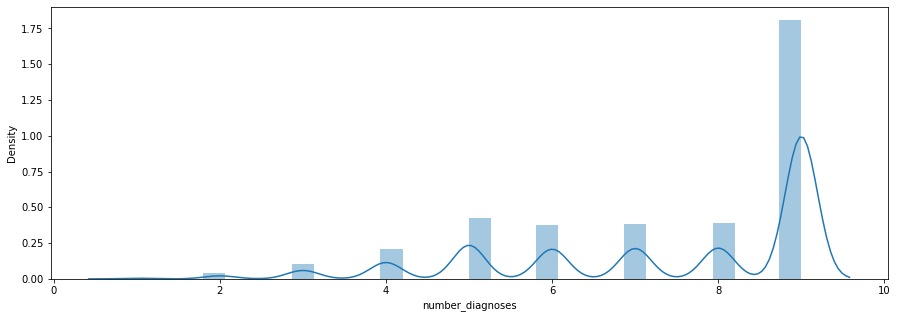

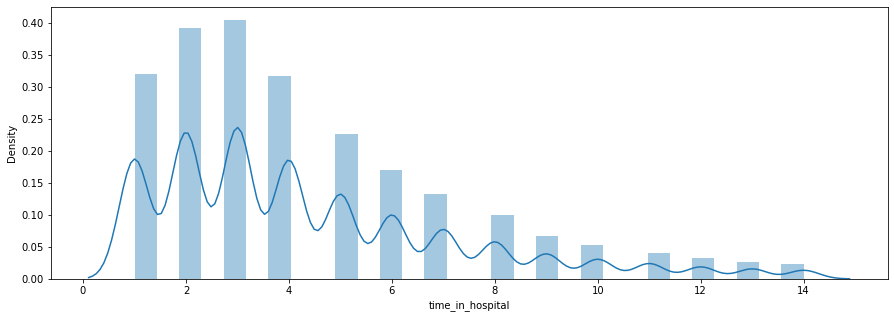

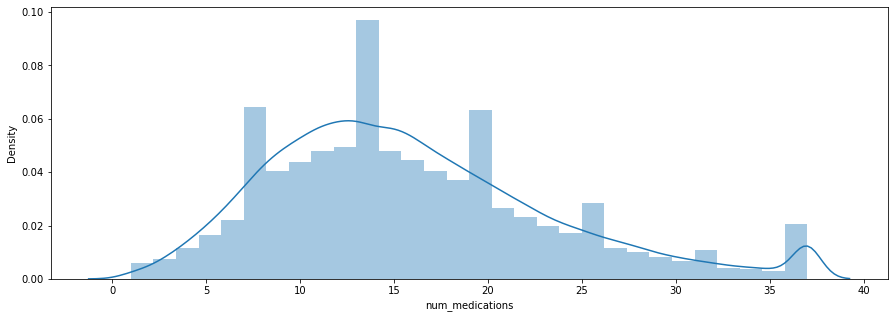

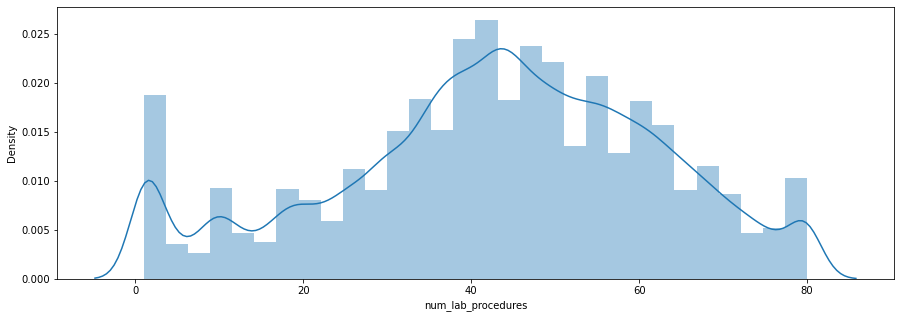

In [157]:
for col in numeric_cols:
    plt.subplots(figsize=(15, 5))
    sns.distplot(df[col] ,kde=True,bins=30)

In [158]:
print(numeric_cols)

['target', 'number_emergency', 'number_inpatient', 'number_outpatient', 'num_procedures', 'number_diagnoses', 'time_in_hospital', 'num_medications', 'num_lab_procedures']


The features 'admission_type_id', 'admission_source_id', and 'discharge_disposition_id' are categorical so we need to reduce the categories and just keep the values that are more significative. (using  `_top_n_categorics` in the **Preprocess** class)

The features 'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient', 'num_medications', 'num_lab_procedures' are numerical but have outliers, so need to treat theses carefully. (using  `_top_outliers` in the **Preprocess** class)

In [170]:
print(categorical_cols)

['gender', 'change', 'rosiglitazone', 'pioglitazone', 'glyburide', 'glipizide', 'glimepiride', 'metformin', 'diabetesMed', 'max_glu_serum', 'race', 'insulin', 'A1Cresult', 'admission_source_id', 'admission_type_id', 'medical_specialty', 'discharge_disposition_id', 'diag_1', 'diag_3', 'diag_2', 'age', 'payer_code']


In [169]:
var_unicos(df[categorical_cols])

,index,Unicos,Tipo
0,gender,2,object
1,change,2,object
2,rosiglitazone,2,object
3,pioglitazone,2,object
4,glyburide,2,object
5,glipizide,2,object
6,glimepiride,2,object
7,metformin,2,object
8,diabetesMed,2,object
10,race,3,object


<ipython-input-159-66d87a2cf8be>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots(figsize=(15, 5))


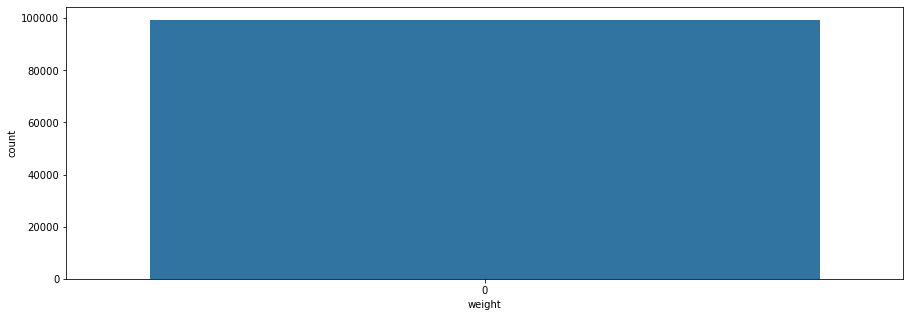

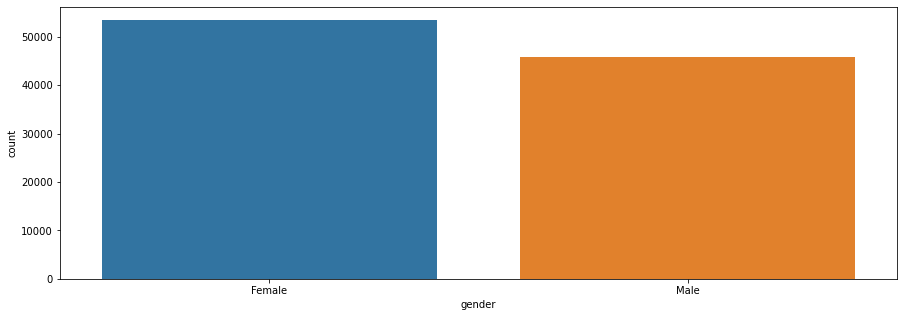

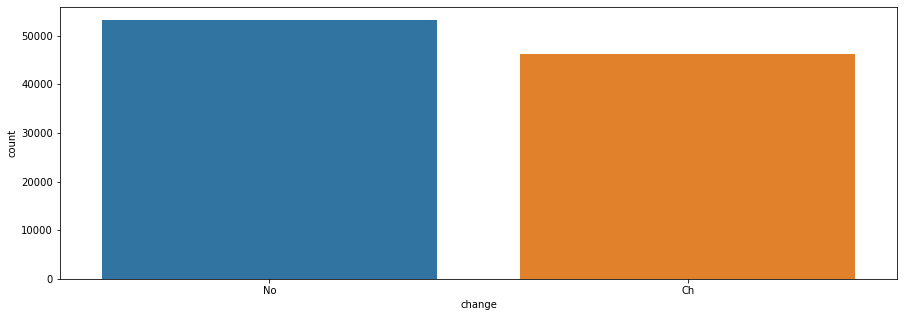

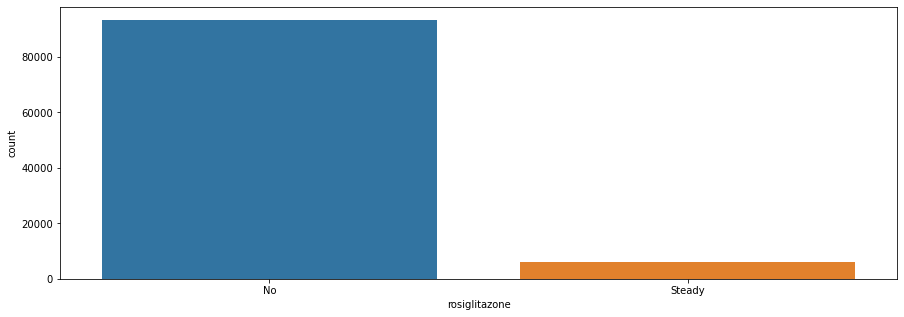

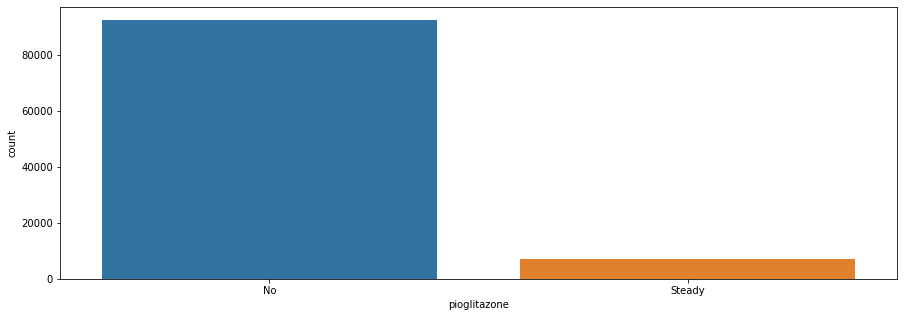

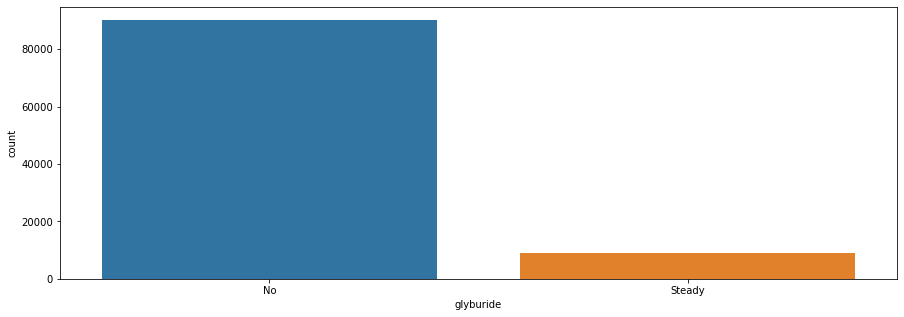

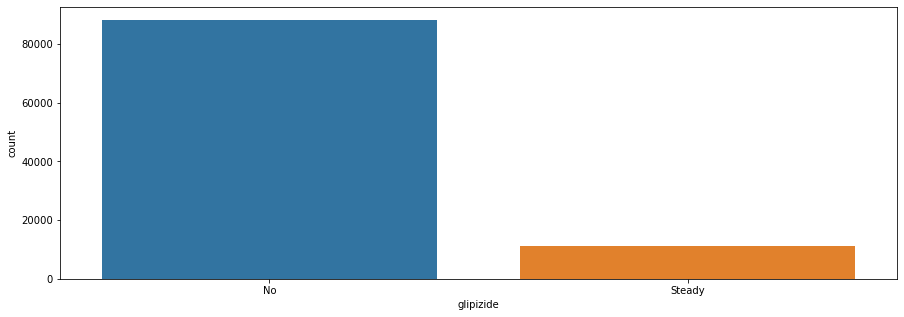

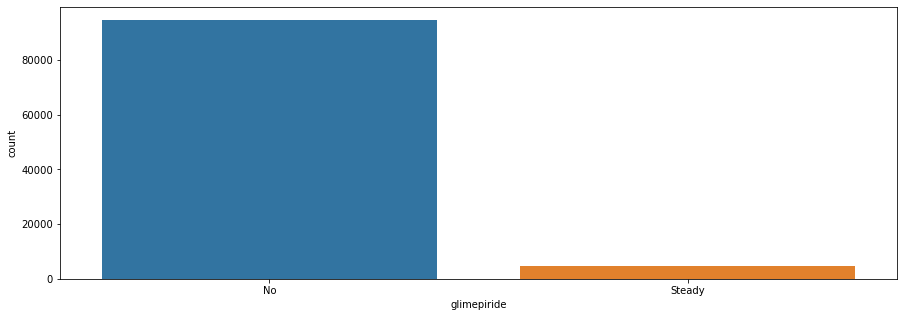

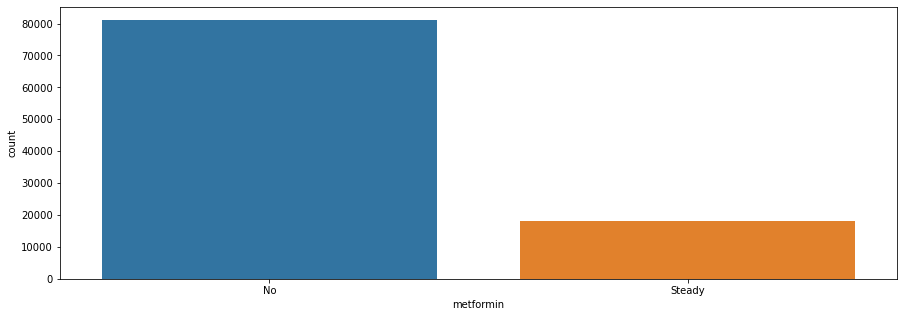

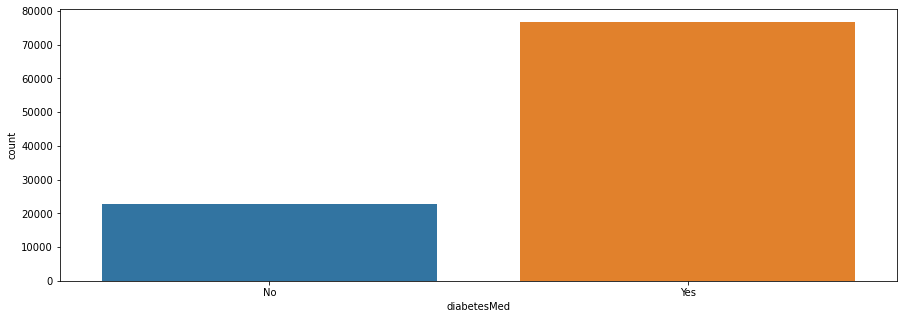

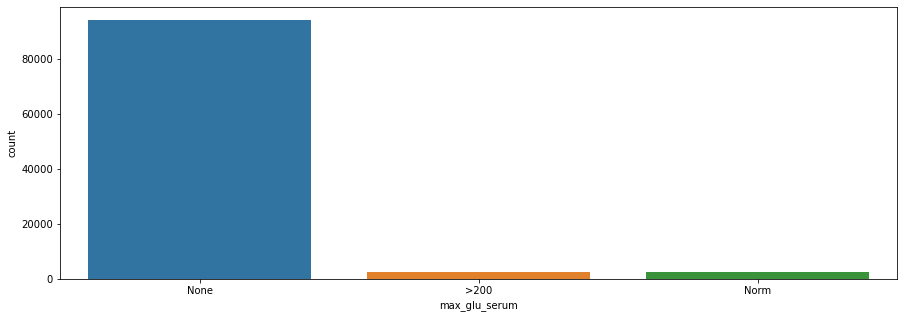

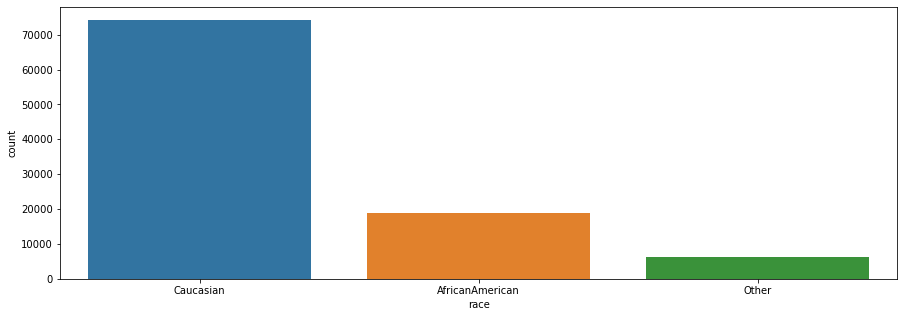

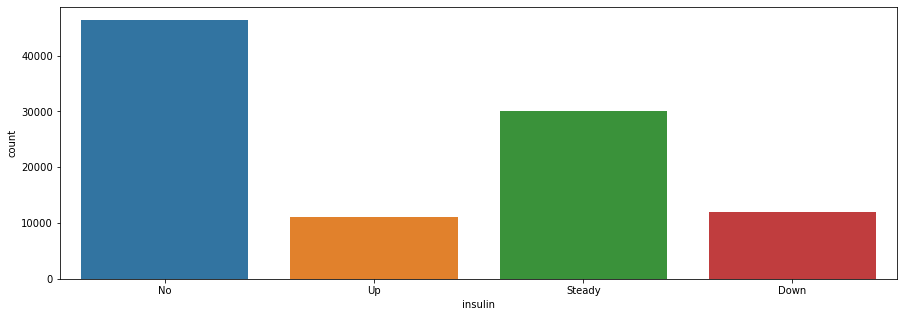

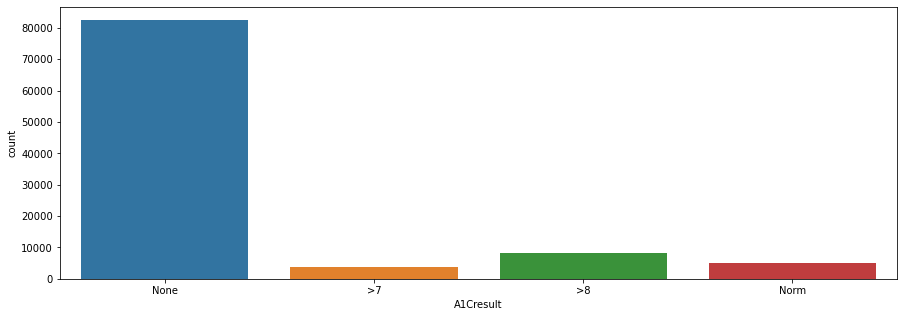

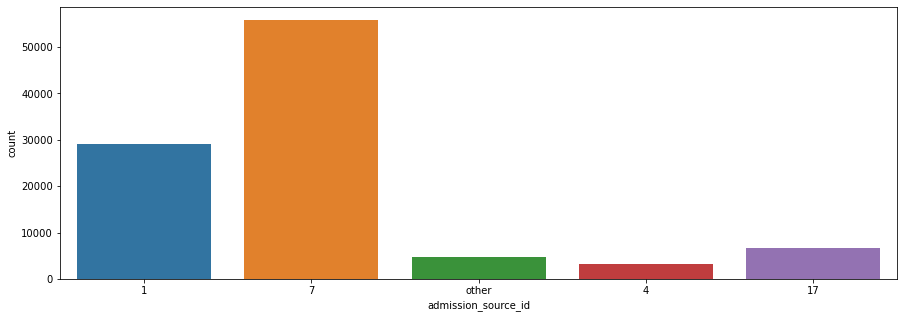

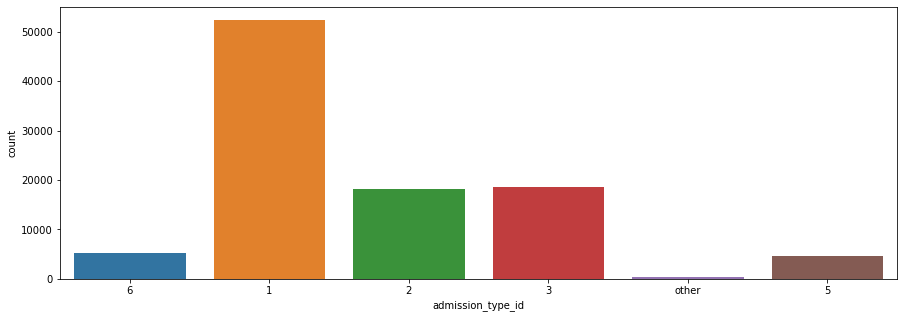

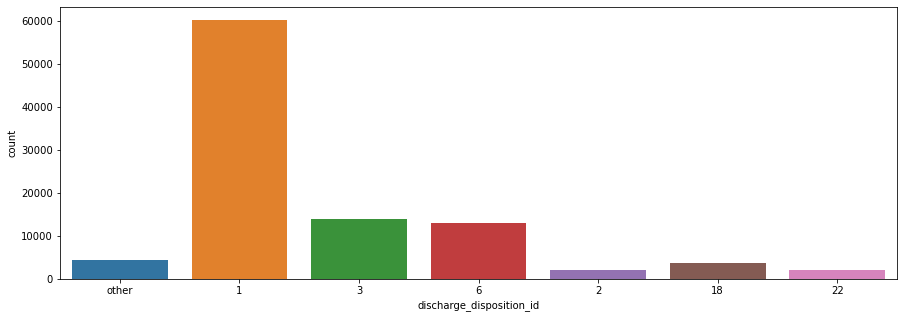

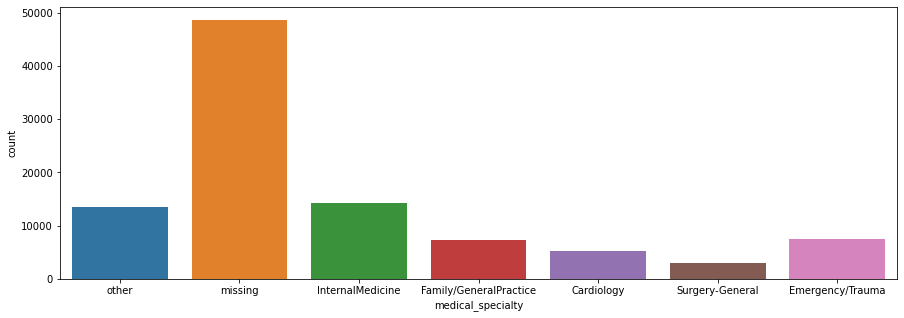

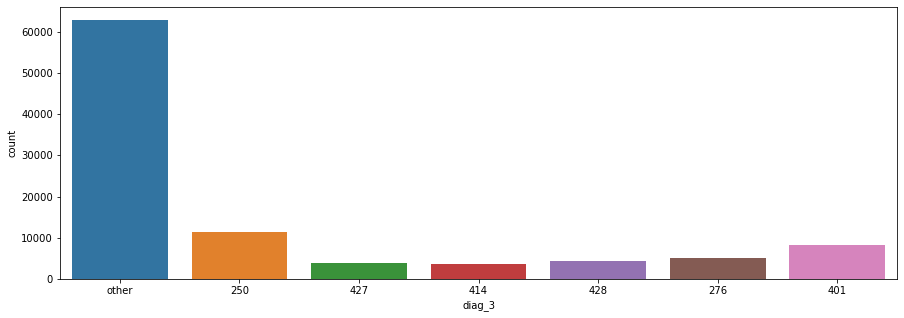

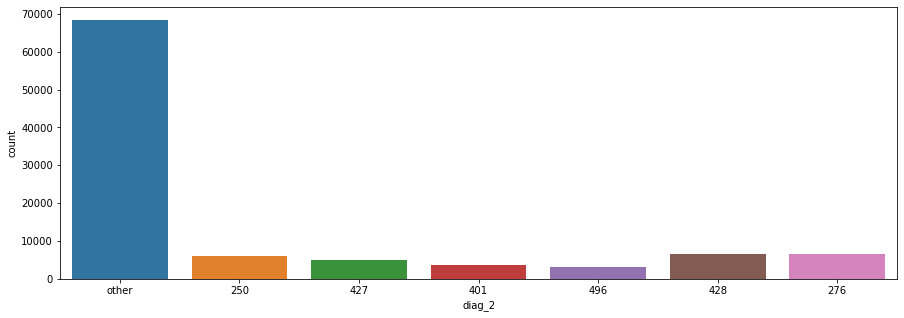

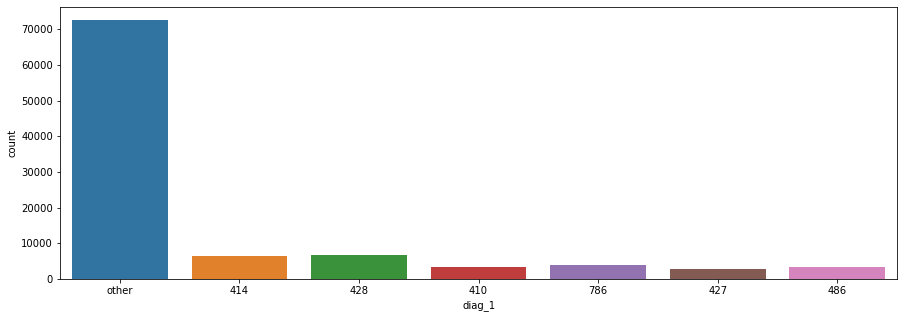

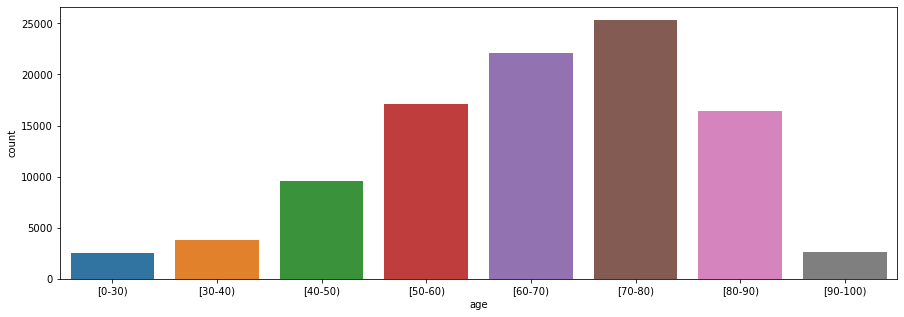

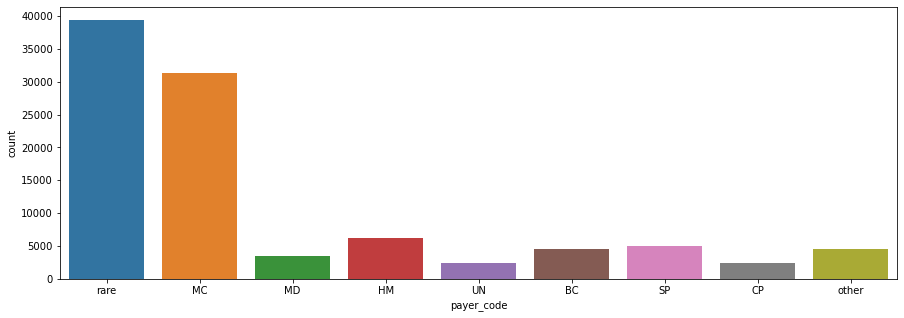

In [159]:
for col in categorical_cols:
    plt.subplots(figsize=(15, 5))
    sns.countplot(x=col,data=df)

## GridSearchHelper Class

In [98]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [99]:
import numpy as np
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#from sklearn.ensemble import VotingClassifier
import pandas as pd

class GridSearchHelper():
    def __init__(self):
        print("GridSearchHelper Created")

        self.gridSearchCV=None
        self.clf_and_params=list()

        self._initialize_clf_and_params()

    def _initialize_clf_and_params(self):
        
        clf = CatBoostClassifier()
        params = {'iterations': [500],
            'depth': [4, 5, 6],
            'loss_function': ['Logloss', 'CrossEntropy'],
            #'l2_leaf_reg': np.logspace(-20, -19, 3),
            #'leaf_estimation_iterations': [10],
            'logging_level':['Silent'],
            'random_seed': [42]
         }
        self.clf_and_params.append((clf, params))
        
        clf= XGBClassifier()
        params={#"learning_rate"    : [0.05, 0.10, 0.20, 0.30 ] ,
                "max_depth"        : [ 3, 5, 8, 11, 15],
                "min_child_weight" : [ 3, 5, 7 ],
                #"gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
                "colsample_bytree" : [ 0.3, 0.5 , 0.7 ]
                }
        self.clf_and_params.append((clf, params))

        clf= KNeighborsClassifier()
        params={'n_neighbors':[5,9,12,15],
          'leaf_size':[1,3,5],
          'weights':['uniform', 'distance']
          }
        self.clf_and_params.append((clf, params))

        #clf=LogisticRegression()
        #params={'penalty':['l2'],#'penalty':['l1', 'l2'],
        #        'C': [0.001,0.01,0.1,1,10,100], #np.logspace(0, 4, 10),
        #        'max_iter': [8600]
        #        }
        #self.clf_and_params.append((clf, params))

        clf = RandomForestClassifier()
        params = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt'],
              #'criterion': ['entropy', 'gini'],
              'max_depth': [2, 5, 10],
              'min_samples_split': [2, 5],
              #'min_samples_leaf': [1,5,8]
             }
        #Because of depricating warning for RandomForestClassifier which is not appended.
        #But it give high competion accuracy score. You can append when you run the kernel
        self.clf_and_params.append((clf, params))

    def fit_predict_save(self, X_train, y_train, strategy_type):
        self.X_train=X_train
        self.y_train=y_train
        self.strategy_type=strategy_type

        clf_and_params = self.get_clf_and_params()
        models=[]
        self.results={}
        for clf, params in clf_and_params:
            self.current_clf_name = clf.__class__.__name__
            grid_search_clf = GridSearchCV(clf, params, cv=5, scoring='recall')
            grid_search_clf.fit(self.X_train, self.y_train)
            clf_train_acc = round(grid_search_clf.score(self.X_train, self.y_train) * 100, 2)
            print(self.current_clf_name, " trained and used for prediction on test data...")
            self.results[self.current_clf_name]=clf_train_acc
            # for ensemble
            models.append(clf)

            #self.save_result()
            print()
    
    def show_result(self):
        for clf_name, train_acc in self.results.items():
                  print("{} train accuracy is {:.3f}".format(clf_name, train_acc))

    def get_clf_and_params(self):

        return self.clf_and_params

    def add(self,clf, params):
        self.clf_and_params.append((clf, params))

### prueba

In [100]:
gridSH = GridSearchHelper()

GridSearchHelper Created


In [317]:
print(df.shape)
df2 = df[drivers+['target']].sample(frac=0.03)
print(df2.shape)

(99340, 104)
(2980, 29)


In [318]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df2.columns = [regex.sub("|", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df2.columns.values]

y_train=df2['target']
train=df2.drop('target', axis=1)

In [330]:
gridSH = GridSearchHelper()
gridSH.fit_predict_save(train, y_train, strategy_type="strategy1")

GridSearchHelper Created
CatBoostClassifier  trained and used for prediction on test data...

XGBClassifier  trained and used for prediction on test data...

KNeighborsClassifier  trained and used for prediction on test data...

RandomForestClassifier  trained and used for prediction on test data...



In [331]:
gridSH.show_result()

CatBoostClassifier train accuracy is 37.430
XGBClassifier train accuracy is 94.570
KNeighborsClassifier train accuracy is 6.860
RandomForestClassifier train accuracy is 34.290


## ObjectOrientedDiabetes Class

In [101]:
class ObjectOrientedDiabetes():

    #def __init__(self, train, test):
    def __init__(self, train):

        print("ObjectOrientedDiabetes object created")
        #properties
        self.number_of_train=train.shape[0]

        self.y_train=train['target']
        self.train=train.drop('target', axis=1)

        #concat train and test data
        self.all_data=self._get_all_data()

        #Create instance of objects
        self._info=Information()
        self.preprocessStrategy = PreprocessStrategy()
        self.gridSearchHelper = GridSearchHelper()
        


    def _get_all_data(self):
        #return pd.concat([self.train, self.test])
        return self.train

    def information(self):
        """
        using _info object gives summary about dataset
        """
        self._info.info(self.all_data)


    def preprocessing(self, strategy_type):
        """
        Process data depend upon strategy type
        :param strategy_type: Preprocessing strategy type
        :return:
        """
        self.strategy_type=strategy_type

        self.all_data = self.preprocessStrategy.strategy(self._get_all_data(), strategy_type)


    def machine_learning(self):
        """
        Get self.X_train, self.X_test and self.y_train
        Find best parameters for classifiers registered in gridSearchHelper
        :return:
        """
        self._get_train_and_test()

        self.gridSearchHelper.fit_predict_save(self.X_train,
                                          self.y_train,
                                          self.strategy_type)
    def show_result(self):
        self.gridSearchHelper.show_result()


    def _get_train_and_test(self):
        """
        Split data into train and test datasets
        :return:
        """
        self.X_train=self.all_data[:self.number_of_train]
        #self.X_test=self.all_data[self.number_of_train:]

### prueba

In [93]:
data = pd.read_csv('./data/diabetic_data.csv')
data['target'] = np.where( data['readmitted']=="<30", 1, 0)

In [94]:
data = data.loc[data.gender.isin(['Female', 'Male'])]
data = data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [95]:
print(data.shape)
train = data.sample(frac=0.03)
print(train.shape)

(99340, 51)
(2980, 51)


In [102]:
#ooDiabetes=ObjectOrientedDiabetes(train, test)
ooDiabetes=ObjectOrientedDiabetes(train)

ObjectOrientedDiabetes object created
Information object created
Preprocess object created
GridSearchHelper Created


In [103]:
ooDiabetes.information()

FEATURE NAME     DATA FORMAT      # OF MISSING VALUES       SAMPLES         
readmitted         object              0                   >30,NO,>30,NO,NO,NO,>30,NO,NO,NO,
num_lab_procedures int64               0                   39,49,34,41,43,52,31,30,30,61,
max_glu_serum      object              0                   None,None,None,Norm,None,None,None,None,None,None,
number_diagnoses   int64               0                   5,4,7,5,6,6,8,5,4,9,
diag_3             object              0                   433,V45,427,250,250,414,788,244,250,263,
diag_2             object              0                   414,401,428,157,280,707,276,41,V64,V45,
diag_1             object              0                   401,786,486,197,578,250.33,787,566,202,V57,
number_inpatient   int64               0                   0,0,1,1,0,1,0,0,0,0,
number_emergency   int64               0                   0,0,0,0,0,0,0,0,0,0,
number_outpatient  int64               0                   0,0,0,0,0,0,0,0,0,0,
num_medi

In [377]:
ooDiabetes.preprocessing(strategy_type='strategy1')

In [379]:
print(ooDiabetes.all_data.shape)
ooDiabetes.all_data.head().transpose()

(2980, 103)


,8002,66987,90579,71403,78475
gender_Female,0.0,0.0,0.0,0.0,1.0
gender_Male,1.0,1.0,1.0,1.0,0.0
change_Ch,1.0,0.0,0.0,1.0,1.0
change_No,0.0,1.0,1.0,0.0,0.0
rosiglitazone_No,1.0,1.0,1.0,1.0,0.0
rosiglitazone_Steady,0.0,0.0,0.0,0.0,1.0
pioglitazone_No,1.0,1.0,1.0,1.0,1.0
pioglitazone_Steady,0.0,0.0,0.0,0.0,0.0
glyburide_No,1.0,1.0,1.0,1.0,1.0
glyburide_Steady,0.0,0.0,0.0,0.0,0.0


In [380]:
ooDiabetes.machine_learning()

CatBoostClassifier  trained and used for prediction on test data...

XGBClassifier  trained and used for prediction on test data...

KNeighborsClassifier  trained and used for prediction on test data...

RandomForestClassifier  trained and used for prediction on test data...



In [381]:
ooDiabetes.show_result()

CatBoostClassifier train accuracy is 14.290
XGBClassifier train accuracy is 79.710
KNeighborsClassifier train accuracy is 6.570
RandomForestClassifier train accuracy is 10.000


In [382]:
ooDiabetes.

CatBoostClassifier train accuracy is 14.290
XGBClassifier train accuracy is 79.710
KNeighborsClassifier train accuracy is 6.570
RandomForestClassifier train accuracy is 10.000


# main call

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [110]:
raw_data_path = os.path.join(os.getcwd(),'data', 'diabetic_data.csv')
data = pd.read_csv(raw_data_path)

In [111]:
data = pd.read_csv('./data/diabetic_data.csv')
data['target'] = np.where( data['readmitted']=="<30", 1, 0)

data = data.loc[data.gender.isin(['Female', 'Male'])]
data = data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [112]:
print(data.shape)
train = data.sample(frac=0.03)
print(train.shape)

(99340, 51)
(2980, 51)


# Classes PY

In [12]:
classes_script_file = os.path.join(os.getcwd(),'scripts','classes_ml.py')
classes_script_file

'C:\\Users\\51993\\Downloads\\dataset_diabetes\\scripts\\classes_ml.py'

In [13]:
%%writefile $classes_script_file
import pandas as pd
import re

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import numpy as np
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#from sklearn.ensemble import VotingClassifier
import pandas as pd

class Information():

    def __init__(self):
        """
        This class give some brief information about the datasets.
        """
        print("Information object created")

    def _get_missing_values(self,data):
        """
        Find missing values of given datad
        :param data: checked its missing value
        :return: Pandas Series object
        """
        #Getting sum of missing values for each feature
        missing_values = data.isnull().sum()
        #Feature missing values are sorted from few to many
        missing_values.sort_values(ascending=False, inplace=True)
        
        #Returning missing values
        return missing_values

    def info(self,data):
        """
        print feature name, data type, number of missing values and ten samples of 
        each feature
        :param data: dataset information will be gathered from
        :return: no return value
        """
        feature_dtypes=data.dtypes
        self.missing_values=self._get_missing_values(data)

        print("=" * 50)

        print("{:16} {:16} {:25} {:16}".format("Feature Name".upper(),
                                            "Data Format".upper(),
                                            "# of Missing Values".upper(),
                                            "Samples".upper()))
        for feature_name, dtype, missing_value in zip(self.missing_values.index.values,
                                                      feature_dtypes[self.missing_values.index.values],
                                                      self.missing_values.values):
            print("{:18} {:19} {:19} ".format(feature_name, str(dtype), str(missing_value)), end="")
            for v in data[feature_name].values[:10]:
                print(v, end=",")
            print()

        print("="*50)

class Preprocess():

    def __init__(self):
        print("Preprocess object created")

    def fillna(self, data, fill_strategies):
        for column, strategy in fill_strategies.items():
            if strategy == 'None':
                data[column] = data[column].fillna('None')
            elif strategy == 'Zero':
                data[column] = data[column].fillna(0)
            elif strategy == 'Mode':
                data[column] = data[column].fillna(data[column].mode()[0])
            elif strategy == 'Mean':
                data[column] = data[column].fillna(data[column].mean())
            elif strategy == 'Median':
                data[column] = data[column].fillna(data[column].median())
            else:
                print("{}: There is no such thing as preprocess strategy".format(strategy))

        return data

    def drop(self, data, drop_strategies):
        for column, strategy in drop_strategies.items():
            data=data.drop(labels=[column], axis=strategy)

        return data

    def feature_engineering(self, data, engineering_strategies=1):
        if engineering_strategies==1:
            return self._feature_engineering1(data)

        return data

    def _feature_engineering1(self,data):

        data=self._base_feature_engineering(data)
        #data = data.loc[data.gender.isin(['Female', 'Male'])]

        drop_strategy = {'examide': 1,  # 1 indicate axis 1(column)
            'citoglipton': 1,
            'metformin-pioglitazone': 1,
            'acetohexamide': 1,
            'metformin-rosiglitazone': 1,
            'glimepiride-pioglitazone': 1,
            'glipizide-metformin': 1,
            'tolbutamide': 1,
            'troglitazone': 1,
            'tolazamide': 1,
            'repaglinide': 1,
            'acarbose': 1,
            'glyburide-metformin': 1,
            'chlorpropamide': 1,
            'nateglinide': 1,
            'miglitol': 1,
            'weight': 1}
        data = self.drop(data, drop_strategy)
        
        vars_top = ['medical_specialty','diag_1', 'diag_2', 'diag_3']
        outliers_top = ['number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient', 'num_medications', 'num_lab_procedures']
        top_n = 6
        
        data = self._top_n_categorics(data, vars_top, top_n)
        data = self._top_outliers(data, outliers_top )
        
        data = self._top_n_categorics(data, ['admission_type_id'], 5)
        data = self._top_n_categorics(data, ['admission_source_id'], 4)
        data = self._top_n_categorics(data, ['discharge_disposition_id'], 6)

        return data

    def _base_feature_engineering(self,data):
        data[['admission_type_id', 'admission_source_id', 'discharge_disposition_id']] = data[['admission_type_id', 'admission_source_id', 'discharge_disposition_id']].astype(str)
        
        data['payer_code'] = data['payer_code'].replace({ '?' : 'rare' })
        data['payer_code'] = np.where( data['payer_code'].isin(['MC','HM','SP','BC','MD','CP','UN','rare']), data['payer_code'], "other")
        data['weight'] = np.where( data['weight']=="?" , "1", "0")
        data['age'] = np.where( data['age'].isin(['[20-30)','[10-20)','[0-10)']), "[0-30)", data['age'])
        data['race'] = np.where( data['race'].isin(['?','Asian','Other','Hispanic']), "Other", data['race'])
        data['metformin'] = np.where( data['metformin']!="Steady", "No", data['metformin'])
        data['max_glu_serum'] = np.where( data['max_glu_serum']==">300", ">200", data['max_glu_serum'])
        #data['A1Cresult'] = np.where( data['A1Cresult']==">8", ">7", data['A1Cresult'])
        data['glimepiride'] = np.where( data['glimepiride']!="Steady", "No", data['glimepiride'])
        data['glipizide'] = np.where( data['glipizide']!="Steady", "No", data['glipizide'])
        data['glyburide'] = np.where( data['glyburide']!="Steady", "No", data['glyburide'])
        data['pioglitazone'] = np.where( data['pioglitazone']!="Steady", "No", data['pioglitazone'])
        data['rosiglitazone'] = np.where( data['rosiglitazone']!="Steady", "No", data['rosiglitazone'])

        return data

    def _label_encoder(self,data):
        labelEncoder=LabelEncoder()
        for column in data.columns.values:
            if 'int64'==data[column].dtype or 'float64'==data[column].dtype or 'int64'==data[column].dtype:
                continue
            labelEncoder.fit(data[column])
            data[column]=labelEncoder.transform(data[column])
        return data
    
    def _top_n_categorics(self, data, vars_top, top_n):
        
        for var in vars_top:
            lista_n= pd.concat( [ ( data.groupby([var])[var].count()/len(data) ).rename("[%]"),
                ( data.groupby([var])[var].count() ).rename("count")], axis=1
                ).sort_values(by='[%]', ascending=False).head(top_n).index.tolist()
            data[var] = np.where( data[var].isin(lista_n), data[var], "other")
        
        return data
    
    def _top_outliers(self, data, vars_top):
        for col in vars_top:
            upper = data[col].quantile(0.98)
            data.loc[data[col]>upper,col] = upper
        
        return data

    def _get_dummies(self, data, prefered_columns=None):

        if prefered_columns is None:
            columns=data.columns.values
            non_dummies=None
        else:
            non_dummies=[col for col in data.columns.values if col not in prefered_columns ]

            columns=prefered_columns


        dummies_data=[pd.get_dummies(data[col],prefix=col) for col in columns]

        if non_dummies is not None:
            for non_dummy in non_dummies:
                dummies_data.append(data[non_dummy])

        return pd.concat(dummies_data, axis=1)

class PreprocessStrategy():
    """
    Preprocess strategies defined and exected in this class
    """
    def __init__(self):
        self.data=None
        self._preprocessor=Preprocess()

    def strategy(self, data, strategy_type="strategy1"):
        self.data=data
        if strategy_type=='strategy1':
            self._strategy1()
        elif strategy_type=='strategy2':
            self._strategy2()

        return self.data

    def _base_strategy(self):
        #self.data['target'] = np.where( self.data['readmitted']=="<30", 1, 0)
        
        drop_strategy = {'encounter_id': 1,  # 1 indicate axis 1(column)
                         'patient_nbr': 1,
                         'readmitted': 1}
        self.data = self._preprocessor.drop(self.data, drop_strategy)
        
        #self.data = self.data.loc[self.data.gender.isin(['Female', 'Male'])]
        #self.data = self.data.loc[~self.data.discharge_disposition_id.isin([11,13,14,19,20,21])]
        self.data = self.data.replace('?', "missing")

        self.data = self._preprocessor.feature_engineering(self.data, 1)
        #self.data = self._preprocessor._label_encoder(self.data)

    def _strategy1(self):
        self._base_strategy()

        self.data=self._preprocessor._get_dummies(self.data,
                                        prefered_columns=['gender', 'change', 'rosiglitazone', 'pioglitazone', 'glyburide', 'glipizide', 'glimepiride', 'metformin', 'diabetesMed', 'max_glu_serum', 'race', 'insulin', 'A1Cresult', 'admission_source_id', 'admission_type_id', 'medical_specialty', 'discharge_disposition_id', 'diag_1', 'diag_3', 'diag_2', 'age', 'payer_code'])
        regex = re.compile(r"\[|\]|<", re.IGNORECASE)
        self.data.columns = [regex.sub("|", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in self.data.columns.values]


    def _strategy2(self):
        self._base_strategy()

        #self.data=self._preprocessor._get_dummies(self.data,
        #                                prefered_columns=None)#None mean that all feature will be dummied


from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import ExtraTreesClassifier

class GridSearchHelper():
    def __init__(self):
        print("GridSearchHelper Created")

        self.gridSearchCV=None
        self.clf_and_params=list()

        self._initialize_clf_and_params()

    def _initialize_clf_and_params(self):
        
        clf = CatBoostClassifier()
        params = {'iterations': [500],
            'depth': [4, 6],
            'loss_function': ['Logloss'], # 'CrossEntropy'
            'l2_leaf_reg': np.logspace(-20, -19, 3),
            'leaf_estimation_iterations': [10],
            'logging_level':['Silent'],
            'random_seed': [42]
         }
        self.clf_and_params.append((clf, params))
        
        clf= XGBClassifier()
        params={"learning_rate"    : [0.05, 0.1, 0.2],
                "max_depth"        : [ 3, 5, 7],
                "min_child_weight" : [ 3, 5, 7 ],
                "gamma"            : [ 0.2 , 0.4],
                "colsample_bytree" : [ 0.5 , 0.7]
                }
        self.clf_and_params.append((clf, params))

        clf= KNeighborsClassifier()
        params={'n_neighbors':[5,9],
          'leaf_size':[1,3],
          'weights':['uniform'] # 'distance'
          }
        self.clf_and_params.append((clf, params))

        clf = RandomForestClassifier()
        params = {'n_estimators': [9, 15, 30],
              'max_features': ['sqrt'], # 'log2'
              #'criterion': ['entropy', 'gini'],
              'max_depth': [10, 15],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1,5]
             }
        #Because of depricating warning for RandomForestClassifier which is not appended.
        #But it give high competion accuracy score. You can append when you run the kernel
        self.clf_and_params.append((clf, params))

    def fit_predict_save(self, X_train, y_train, strategy_type):
        self.X_train=X_train
        self.y_train=y_train
        self.strategy_type=strategy_type
        
        ################# Select Drivers ##########################
        filter_col = self.X_train.columns #selecionar features ###<<<<<<<<<<<<
        #target='target'

        forest = RFC(n_jobs=2,n_estimators=250)
        forest.fit(self.X_train[filter_col], self.y_train)
        importances1 = forest.feature_importances_

        extree = ExtraTreesClassifier()
        extree.fit(self.X_train[filter_col], self.y_train)
        # display the relative importance of each attribute
        relval = extree.feature_importances_

        forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
        forest.fit(self.X_train[filter_col], self.y_train)
        importances2 = forest.feature_importances_

        top_v = 25
        drivers1 = pd.DataFrame( {'IMP':importances1 ,'Driver':filter_col} 
                    ).sort_values(by=["IMP"],ascending=False).head(top_v)['Driver'].tolist()
        drivers2 = pd.DataFrame( {'IMP':relval ,'Driver':filter_col} 
                    ).sort_values(by=["IMP"],ascending=False).head(top_v)['Driver'].tolist()
        drivers3 = pd.DataFrame( {'IMP':importances2 ,'Driver':filter_col} 
                    ).sort_values(by=["IMP"],ascending=False).head(top_v)['Driver'].tolist()

        drivers = drivers1+drivers2+drivers3
        drivers = set(drivers)
        drivers = list(drivers)
        #print(len(drivers))
        
        self.drivers=drivers
        
        ############
        
        clf_and_params = self.get_clf_and_params()
        models=[]
        self.results={}
        for clf, params in clf_and_params:
            self.current_clf_name = clf.__class__.__name__
            grid_search_clf = GridSearchCV(clf, params, cv=5, scoring='recall') #scoring='recall'
            grid_search_clf.fit(self.X_train[self.drivers], self.y_train)
            clf_train_acc = round(grid_search_clf.score(self.X_train[self.drivers], self.y_train) * 100, 2)
            print(self.current_clf_name, " trained and used for prediction on test data...")
            self.results[self.current_clf_name]=(clf_train_acc, grid_search_clf)
            # for ensemble
            models.append(clf)

            #self.save_result()
            print()
    
    def show_result(self):
        for clf_name, tupla in self.results.items():
            print("{} its recall is {:.3f}".format(clf_name, tupla[0]))

    def get_clf_and_params(self):

        return self.clf_and_params

    def add(self,clf, params):
        self.clf_and_params.append((clf, params))

class ObjectOrientedDiabetes():

    def __init__(self, train):
        """
        :param train: train data will be used for modelling
        :param test:  test data will be used for model evaluation
        """
        print("ObjectOrientedDiabetes object created")
        #properties
        self.number_of_train=train.shape[0]

        self.y_train=train['target']
        self.train=train.drop('target', axis=1)

        #concat train and test data
        self.all_data=self._get_all_data()

        #Create instance of objects
        self._info=Information()
        self.preprocessStrategy = PreprocessStrategy()
        self.gridSearchHelper = GridSearchHelper()

    def _get_all_data(self):
        #return pd.concat([self.train, self.test])
        return self.train

    def information(self):
        """
        using _info object gives summary about dataset
        :return:
        """
        self._info.info(self.all_data)

    def preprocessing(self, strategy_type):
        """
        Process data depend upon strategy type
        :param strategy_type: Preprocessing strategy type
        :return:
        """
        self.strategy_type=strategy_type

        self.all_data = self.preprocessStrategy.strategy(self._get_all_data(), strategy_type)


    def machine_learning(self):
        """
        Get self.X_train, self.X_test and self.y_train
        Find best parameters for classifiers registered in gridSearchHelper
        :return:
        """
        self._get_train_and_test()

        self.gridSearchHelper.fit_predict_save(self.X_train,
                                          self.y_train,
                                          self.strategy_type)
    def show_result(self):
        self.gridSearchHelper.show_result()

    def _get_train_and_test(self):
        """
        Split data into train and test datasets
        :return:
        """
        self.X_train=self.all_data[:self.number_of_train]
        #self.X_test=self.all_data[self.number_of_train:]

Overwriting C:\Users\51993\Downloads\dataset_diabetes\scripts\classes_ml.py


# Final

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os

from scripts.classes_ml import *

raw_data_path = os.path.join(os.getcwd(),'data', 'diabetic_data.csv')
data = pd.read_csv(raw_data_path)

data['target'] = np.where( data['readmitted']=="<30", 1, 0)
data = data.loc[data.gender.isin(['Female', 'Male'])]
data = data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [12]:
#print(data.shape)
#train = data.sample(frac=0.80)
#print(train.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,data['target'], test_size = 0.2, random_state = 0)

In [13]:
%%time
ooDiabetes=ObjectOrientedDiabetes(X_train)
#ooDiabetes.information()
ooDiabetes.preprocessing(strategy_type='strategy1')
ooDiabetes.machine_learning()

ObjectOrientedDiabetes object created
Information object created
Preprocess object created
GridSearchHelper Created
CatBoostClassifier  trained and used for prediction on test data...

XGBClassifier  trained and used for prediction on test data...

KNeighborsClassifier  trained and used for prediction on test data...

RandomForestClassifier  trained and used for prediction on test data...

Wall time: 26min 8s


In [14]:
ooDiabetes.show_result()

CatBoostClassifier its recall is 1.500
XGBClassifier its recall is 3.790
KNeighborsClassifier its recall is 9.410
RandomForestClassifier its recall is 16.320


In [4]:
#ooDiabetes.gridSearchHelper.results
ooDiabetes.show_result()

CatBoostClassifier its recall is 1.510
XGBClassifier its recall is 4.100
KNeighborsClassifier its recall is 9.390
RandomForestClassifier its recall is 19.180


In [5]:
print(ooDiabetes.gridSearchHelper.drivers)

['diag_3_other', 'time_in_hospital', 'diag_1_other', 'num_procedures', 'age_|70-80)', 'number_emergency', 'medical_specialty_InternalMedicine', 'race_Caucasian', 'race_AfricanAmerican', 'number_diagnoses', 'insulin_Steady', 'admission_source_id_7', 'medical_specialty_missing', 'payer_code_MC', 'age_|60-70)', 'number_inpatient', 'num_medications', 'gender_Male', 'gender_Female', 'payer_code_other', 'admission_type_id_2', 'age_|50-60)', 'age_|80-90)', 'diag_2_other', 'admission_type_id_1', 'number_outpatient', 'num_lab_procedures']


In [6]:
for clf_name, tupla in ooDiabetes.gridSearchHelper.results.items():
    print("Modelo: {} \nBest Paramaters:{}".format(clf_name, tupla[1].best_params_))
    print("----"*25)  

Modelo: CatBoostClassifier 
Best Paramaters:{'depth': 6, 'iterations': 500, 'l2_leaf_reg': 1e-20, 'leaf_estimation_iterations': 10, 'logging_level': 'Silent', 'loss_function': 'Logloss', 'random_seed': 42}
----------------------------------------------------------------------------------------------------
Modelo: XGBClassifier 
Best Paramaters:{'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 5}
----------------------------------------------------------------------------------------------------
Modelo: KNeighborsClassifier 
Best Paramaters:{'leaf_size': 1, 'n_neighbors': 5, 'weights': 'uniform'}
----------------------------------------------------------------------------------------------------
Modelo: RandomForestClassifier 
Best Paramaters:{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 9}
--------------------------------------------------------------------------------------------

In [17]:
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score,confusion_matrix)

def evaluar_model( data_X, label_y, model_rf ):
    X_ = data_X.copy()
    y_ = label_y.copy()
    
    y_pred = model_rf.predict(X_)

    print("\t\tAccuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \tF1: %1.3f" %  ( accuracy_score(y_, y_pred), precision_score(y_, y_pred), recall_score(y_, y_pred), f1_score(y_, y_pred) )  )
    #print(confusion_matrix(y_,y_pred) )
    #print("=====================================================")

In [15]:
oop = ObjectOrientedDiabetes(X_test)
oop.preprocessing(strategy_type='strategy1')
print(ooDiabetes.all_data.shape)
print(oop.all_data.shape)
print(oop.all_data[ooDiabetes.gridSearchHelper.drivers].shape)

ObjectOrientedDiabetes object created
Information object created
Preprocess object created
GridSearchHelper Created
(79472, 103)
(19868, 103)
(19868, 27)


In [18]:
for clf_name, tupla in ooDiabetes.gridSearchHelper.results.items():
    print("Modelo: {}".format(clf_name))
    evaluar_model( oop.all_data[ooDiabetes.gridSearchHelper.drivers], y_test, tupla[1].best_estimator_ )
    print("----"*25)  

Modelo: CatBoostClassifier
		Accuracy: 0.887 	Precision: 0.500 	Recall: 0.003 	F1: 0.006
----------------------------------------------------------------------------------------------------
Modelo: XGBClassifier
		Accuracy: 0.887 	Precision: 0.380 	Recall: 0.008 	F1: 0.017
----------------------------------------------------------------------------------------------------
Modelo: KNeighborsClassifier
		Accuracy: 0.878 	Precision: 0.188 	Recall: 0.024 	F1: 0.043
----------------------------------------------------------------------------------------------------
Modelo: RandomForestClassifier
		Accuracy: 0.886 	Precision: 0.372 	Recall: 0.016 	F1: 0.030
----------------------------------------------------------------------------------------------------


# Conclusion
The aproach for this dataset was to created a binary classifier to predict the probability that a patient with diabetes would be readmitted to the hospital within 30 days. 

I focus in Recall because we are dealing with people lives, so it it important to catch the maximum numbers of cases that can end in a death.

Many ML model were developed and the best model had a precision of 38% but a lower recall in the test data.

There many upgrades to this project to improve the results, I'll list some of them:
* Work more in the feature engineering to get more information from the data
* Try regularization to reduce overfitting.
* Try more configuration for hyperparameter tunning
* Try more models